# Objective

To build a preictive model which can identify a pattren in variables and suggest that a hack is going to happen or not.
**To Predict if the server is hacked**

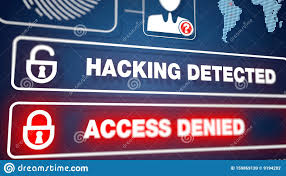

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/Test.csv
/kaggle/input/Train.csv
/kaggle/input/sample_submission.csv


## Importing Required Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from scipy.stats import norm, skew
from scipy.special import boxcox1p
import xgboost
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

## Reading the Dataset

In [3]:
train = pd.read_csv('/kaggle/input/Train.csv')
test = pd.read_csv('/kaggle/input/Test.csv')

In [4]:
train.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [5]:
test.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,CR_195453,01-FEB-18,0,30,35,7,3,6,4,0,5,1,174,NaN,72,119,23
1,CR_103520,05-MAR-04,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34
2,CR_196089,27-JAN-18,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0,34
3,CR_112195,18-AUG-06,7,3,2,3,5,9,8,0,5,1,174,1.0,112,87,34
4,CR_149832,31-OCT-11,0,7,8,7,3,2,7,1,5,1,174,0.0,112,93,43


## Descriptive Analysis

In [6]:
print('Shape of Training Data is:', train.shape)
print('Shape of Test Data is:', test.shape)

Shape of Training Data is: (23856, 18)
Shape of Test Data is: (15903, 17)


In [7]:
train.describe()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
count,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23674.000000,23856.000000,23856.000000,23856.000000,23856.000000
mean,0.483778,24.791206,24.637450,4.276744,2.455609,6.154175,4.876509,0.972460,4.924128,1.244802,206.954519,0.974064,85.237383,72.674296,33.464747,0.955231
std,1.439738,15.240231,15.135093,2.944672,1.963095,4.471756,3.881931,1.453144,1.362625,1.119301,93.033348,1.167725,27.597226,43.297320,8.386834,0.206800
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,8.000000,2.000000,1.000000,3.000000,2.000000,0.000000,5.000000,1.000000,174.000000,1.000000,72.000000,29.000000,34.000000,1.000000
50%,0.000000,24.000000,24.000000,4.000000,3.000000,5.000000,4.000000,1.000000,5.000000,1.000000,249.000000,1.000000,98.000000,62.000000,34.000000,1.000000
75%,0.000000,36.000000,35.000000,6.000000,5.000000,8.000000,7.000000,1.000000,6.000000,1.000000,249.000000,1.000000,103.000000,107.000000,34.000000,1.000000
max,7.000000,52.000000,52.000000,10.000000,5.000000,19.000000,18.000000,99.000000,6.000000,90.000000,332.000000,90.000000,116.000000,142.000000,50.000000,1.000000


In [8]:
test.describe()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
count,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15776.000000,15903.000000,15903.000000,15903.000000
mean,0.468088,24.722631,24.575049,4.284223,2.448469,6.084890,4.862605,0.986732,4.908759,1.241212,206.954097,0.972236,85.191096,72.218575,33.422625
std,1.412112,15.228841,15.127451,2.974584,1.963372,4.451117,3.854550,1.471274,1.374677,0.841804,93.107783,0.876669,27.493192,43.438227,8.314284
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,8.000000,2.000000,1.000000,3.000000,2.000000,0.000000,5.000000,1.000000,174.000000,1.000000,72.000000,29.000000,34.000000
50%,0.000000,24.000000,24.000000,4.000000,3.000000,5.000000,4.000000,1.000000,5.000000,1.000000,249.000000,1.000000,98.000000,62.000000,34.000000
75%,0.000000,36.000000,35.000000,6.000000,5.000000,8.000000,7.000000,1.000000,6.000000,1.000000,249.000000,1.000000,103.000000,107.000000,34.000000
max,7.000000,52.000000,52.000000,10.000000,5.000000,19.000000,18.000000,50.000000,6.000000,40.000000,332.000000,40.000000,117.000000,142.000000,50.000000


**By comparing maximum value of train and test data it can be seen that many features of train data have outliers...** For Example - As we can see 'X_12' feature its max value in test set is 40 and in train set is 90, so we can drop values greater that 40 from test set

In [9]:
train.drop(train[train['X_10']>test['X_10'].max()].index, inplace = True, axis = 0)
train.drop(train[train['X_8']>test['X_8'].max()].index, inplace = True, axis = 0)
train.drop(train[train['X_12']>test['X_12'].max()].index, inplace = True, axis = 0)

## Dealing with Missing Values of Train Data

In [10]:
train.isnull().sum()

INCIDENT_ID           0
DATE                  0
X_1                   0
X_2                   0
X_3                   0
X_4                   0
X_5                   0
X_6                   0
X_7                   0
X_8                   0
X_9                   0
X_10                  0
X_11                  0
X_12                182
X_13                  0
X_14                  0
X_15                  0
MULTIPLE_OFFENSE      0
dtype: int64

**Feature 'X_12' has missing values** -- Let's check it's percentage of missing values

In [11]:
print('Percentage of missing values in X_12 features:', train['X_12'].isnull().sum()/len(train), '%')

Percentage of missing values in X_12 features: 0.007630067496750933 %


As there is very small percentage of missing values, therefore we drop those entries containing the missing values

In [12]:
train.dropna(inplace = True)
train.shape

(23671, 18)

## Detecting Categorical variables

In [13]:
for feat in train.columns:
    print(feat , train[feat].nunique())

INCIDENT_ID 23671
DATE 9099
X_1 8
X_2 52
X_3 52
X_4 10
X_5 5
X_6 19
X_7 19
X_8 23
X_9 7
X_10 21
X_11 133
X_12 20
X_13 60
X_14 61
X_15 28
MULTIPLE_OFFENSE 2


Seems like features 'X_1', 'X_4', 'X_5', 'X_9', 'X_6', 'X_7' can be treated as categorical as they have limited number of distinct values

In [14]:
for feat in ['X_1', 'X_4', 'X_5', 'X_9', 'X_6', 'X_7']:
    train[feat] = train[feat].astype(str)
    test[feat] = test[feat].astype(str)

## Checking proportion of Output variable

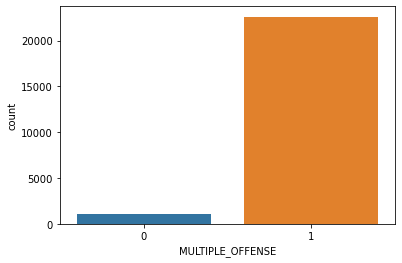

In [15]:
sns.countplot(train['MULTIPLE_OFFENSE'])

**As we can see the dataset is Imbalanced**. So, firstly we will balance the dataset with the over-sample techique in which minority class will replicate its data and will have then have  equal number of records of that of Majority Class.
Here 'Minority Class' is Class 0 and 'Majority Class' is Class 1.

## Handling Imbalanced Dataset

In [16]:
X = train.drop(['INCIDENT_ID', "DATE", 'MULTIPLE_OFFENSE'], axis = 1)
y = train['MULTIPLE_OFFENSE']

In [17]:
from imblearn.over_sampling import SMOTENC
sm = SMOTENC(random_state=42, categorical_features=[0,3,4,8,5,6])
X_res, y_res = sm.fit_resample(X, y)

Using TensorFlow backend.


In [18]:
data = pd.concat([X_res, y_res], axis = 1)
data.shape

(45206, 16)

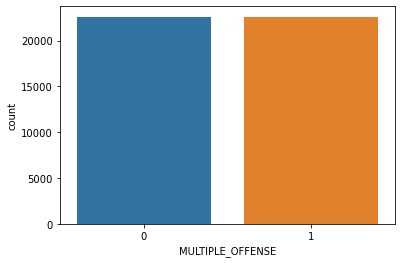

In [19]:
sns.countplot(data['MULTIPLE_OFFENSE'])

#### Now the dataset is BALANCED

## Analyzing Correlation between Features

Text(0.5, 1.0, 'Heatmap for Correlation between Features')

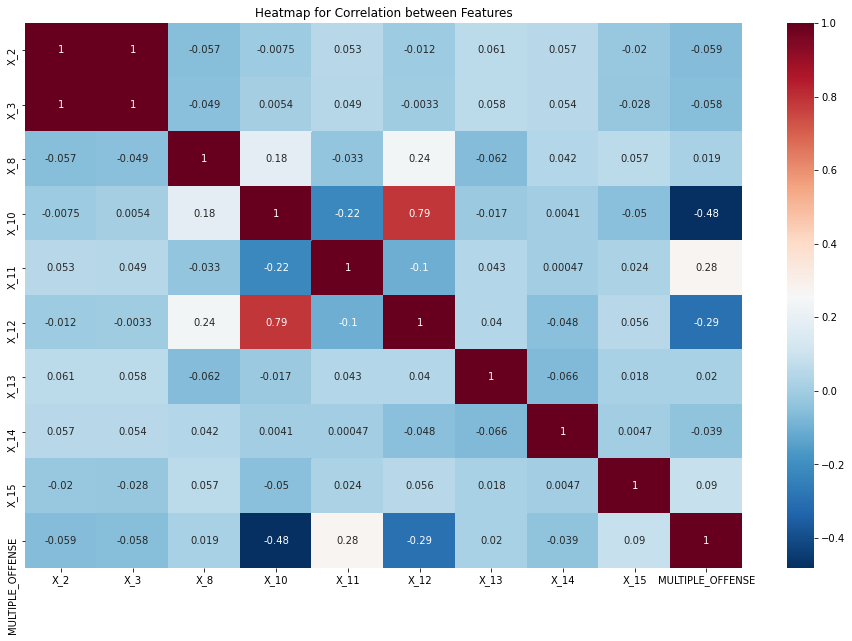

In [20]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
plt.figure(figsize=(13,9))
sns.heatmap(data.corr(), annot = True, cmap=plt.cm.RdBu_r)
plt.title('Heatmap for Correlation between Features')

As we can see **'X_2', 'X_3' are highly correlated**. There we can drop one column while training the data.
Also, **'X_10' and 'X_12' are highly correlated**. Therefore we can fill nan value of feature 'X_12' with the values of feature 'X_10' in test data 

## Handling Missing Values in Test Data

In [21]:
test.isnull().sum()

INCIDENT_ID      0
DATE             0
X_1              0
X_2              0
X_3              0
X_4              0
X_5              0
X_6              0
X_7              0
X_8              0
X_9              0
X_10             0
X_11             0
X_12           127
X_13             0
X_14             0
X_15             0
dtype: int64

In [22]:
test['X_12'] = test['X_12'].fillna(test['X_10'])

## Label Encoding the Categorical Features

Need to convert object datatype into integer datatype to get the data prepare for Classification Model Training

In [23]:
cols = ['X_1', 'X_4', 'X_5', 'X_9', 'X_6', 'X_7']

for c in cols:
    # train data
    lbl = LabelEncoder() 
    lbl.fit(list(data[c].values)) 
    data[c] = lbl.transform(list(data[c].values))
    
    # test data
    lbl.fit(list(test[c].values)) 
    test[c] = lbl.transform(list(test[c].values))

## Checking skewness of the variable

In [24]:
numeric_feat = [feature for feature in data.columns if feature not in cols]
numeric_feat.remove('MULTIPLE_OFFENSE')
skewed_feat = data[numeric_feat].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
skewness = pd.DataFrame({'Skew' :skewed_feat})
skewness.head(10)

,Skew
X_8,5.669088
X_10,5.340963
X_12,4.747129
X_14,0.214150
X_3,-0.163027
X_2,-0.178844
X_11,-0.480947
X_13,-1.420681
X_15,-2.369913


### Trying to reduce the skewness using boxcox transformation

In [25]:
df_train = data.copy()
skewed_features = ['X_8', 'X_10', 'X_12', 'X_11', 'X_13', 'X_15']
lamda = 0.4
for feat in skewed_features:
    df_train[feat] = boxcox1p(df_train[feat],lamda)

In [26]:
numeric_feat = [feature for feature in df_train.columns if feature not in cols]
numeric_feat.remove('MULTIPLE_OFFENSE')
skewed_feat = df_train[numeric_feat].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
skewness = pd.DataFrame({'Skew' :skewed_feat})
skewness.head(10)

,Skew
X_10,2.170941
X_8,1.544277
X_12,1.225497
X_14,0.214150
X_3,-0.163027
X_2,-0.178844
X_11,-1.695036
X_13,-1.972167
X_15,-3.565158


### Applying boxcox transformation on Test Data

In [27]:
df_test = test.copy()
skewed_features = ['X_8', 'X_10', 'X_12', 'X_11', 'X_13', 'X_15']
lamda = 0.4
for feat in skewed_features:
    df_test[feat] = boxcox1p(df_test[feat],lamda)

## Getting Data prepared for Modelling

In [28]:
X = df_train.drop(['MULTIPLE_OFFENSE','X_2'], axis = 1)
y = df_train['MULTIPLE_OFFENSE']

## Splitting Data into Train and Test Set

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=101)
X_train.shape

(40685, 14)

## Training Data on Xgboost Classifier with RandomizedSearchCV

In [30]:
xg = xgboost.XGBClassifier()
# Hyper-parameters to be tuned
param_grid = dict(learning_rate = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3], max_depth = [3,4,5,6,8,10,12,15],
                 min_child_weight = [1,3,5,7], gamma = [0.0,0.1,0.2,0.3,0.4], colsample_bytree = [0.3,0.4,0.5,0.6])
grid_xg = RandomizedSearchCV(xg, param_grid, cv=10, scoring = 'f1')
grid_xg.fit(X,y)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,...
                                           verbosity=None),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                           

In [31]:
# Check out best parameters and best score
print(grid_xg.best_score_)
print(grid_xg.best_params_)

0.9994473572868365
{'min_child_weight': 1, 'max_depth': 8, 'learning_rate': 0.25, 'gamma': 0.4, 'colsample_bytree': 0.4}


### Confusion Matrix on predicting on Train set

In [32]:
y_train_pred = grid_xg.predict(X_train)
confusion_matrix(y_train, y_train_pred)

array([[20372,     7],
       [    0, 20306]])

### Classification Report on predicting on Train set

In [33]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20379
           1       1.00      1.00      1.00     20306

    accuracy                           1.00     40685
   macro avg       1.00      1.00      1.00     40685
weighted avg       1.00      1.00      1.00     40685



### Confusion Matrix on predicting on Validation set

In [34]:
y_test_pred = grid_xg.predict(X_test)
confusion_matrix(y_test, y_test_pred)

array([[2224,    0],
       [   0, 2297]])

### Classification Report on predicting on Validation set

In [35]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2224
           1       1.00      1.00      1.00      2297

    accuracy                           1.00      4521
   macro avg       1.00      1.00      1.00      4521
weighted avg       1.00      1.00      1.00      4521



## Getting Submission File Ready and Prediction on Test Data File

In [37]:
y_pred_xg = grid_xg.predict(df_test.drop(['INCIDENT_ID', 'DATE', 'X_2'],axis=1))
y_pred = pd.DataFrame(y_pred_xg, columns=['MULTIPLE_OFFENSE'])
sub = pd.concat([df_test['INCIDENT_ID'].astype(str), y_pred], axis=1)
sub.to_csv("sample_submission.csv", index=False)

# One line Code to Visualize Data 

In [ ]:
!pip install sweetviz
import sweetviz
report = sweetviz.analyze([train, 'Train'], target_feat = 'MULTIPLE_OFFENSE')

     |████████████████████████████████| 323 kB 8.7 MB/s eta 0:00:01


In [ ]:
# To download the html file containing the visualizations
report.show_html('Report.html')

# One line Code for Exploratory Data Analysis

In [ ]:
!pip install pandas-profiling
from pandas_profiling import ProfileReport

In [ ]:
profile = ProfileReport(train, title = 'Pandas Profile_Report')

In [ ]:
# To visualize here
profile.to_widgets()

In [ ]:
# To download the html file EDA
profile.to_file('Profile.html')